# **Predict next-day rain in Australia**
### **Source** :https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

* **Date** :
The date of observation




* **Location** :
The common name of the location of the weather station
* **MinTemp** :
The minimum temperature in degrees celsius
* **MaxTemp** :
The maximum temperature in degrees celsius
* **Rainfall** :
The amount of rainfall recorded for the day in mm
* **Evaporation** :
The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine** :
The number of hours of bright sunshine in the day.
* **WindGustDir** :
The direction of the strongest wind gust in the 24 hours to midnight
* **WindGustSpeed** :
The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WindDir9am** :
Direction of the wind at 9am
* **WindDir3pm**: Direction of the wind at 3pm
* **WindSpeed9am**:Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm**:Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am**:Humidity (percent) at 9am
* **Humidity3pm**:Humidity (percent) at 3pm
* **Pressure9am**:Atmospheric pressure (hpa) reduced to mean sea level at 9am
* **Pressure3pm**:Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am**:Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
* **Cloud3pm**:Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* **Temp9am**:Temperature (degrees C) at 9am
* **Temp3pm**:Temperature (degrees C) at 3pm
* **RainToday**:Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* **RainTomorrow**:The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".



In [ ]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.select_dtypes('object').columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.select_dtypes('float64').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [ ]:
cat_columns = df.select_dtypes('object').columns.to_list()
cat_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
#lets get the list of Nuemrical feature column list
num_cols = df.select_dtypes('number').columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'day']

<Axes: >

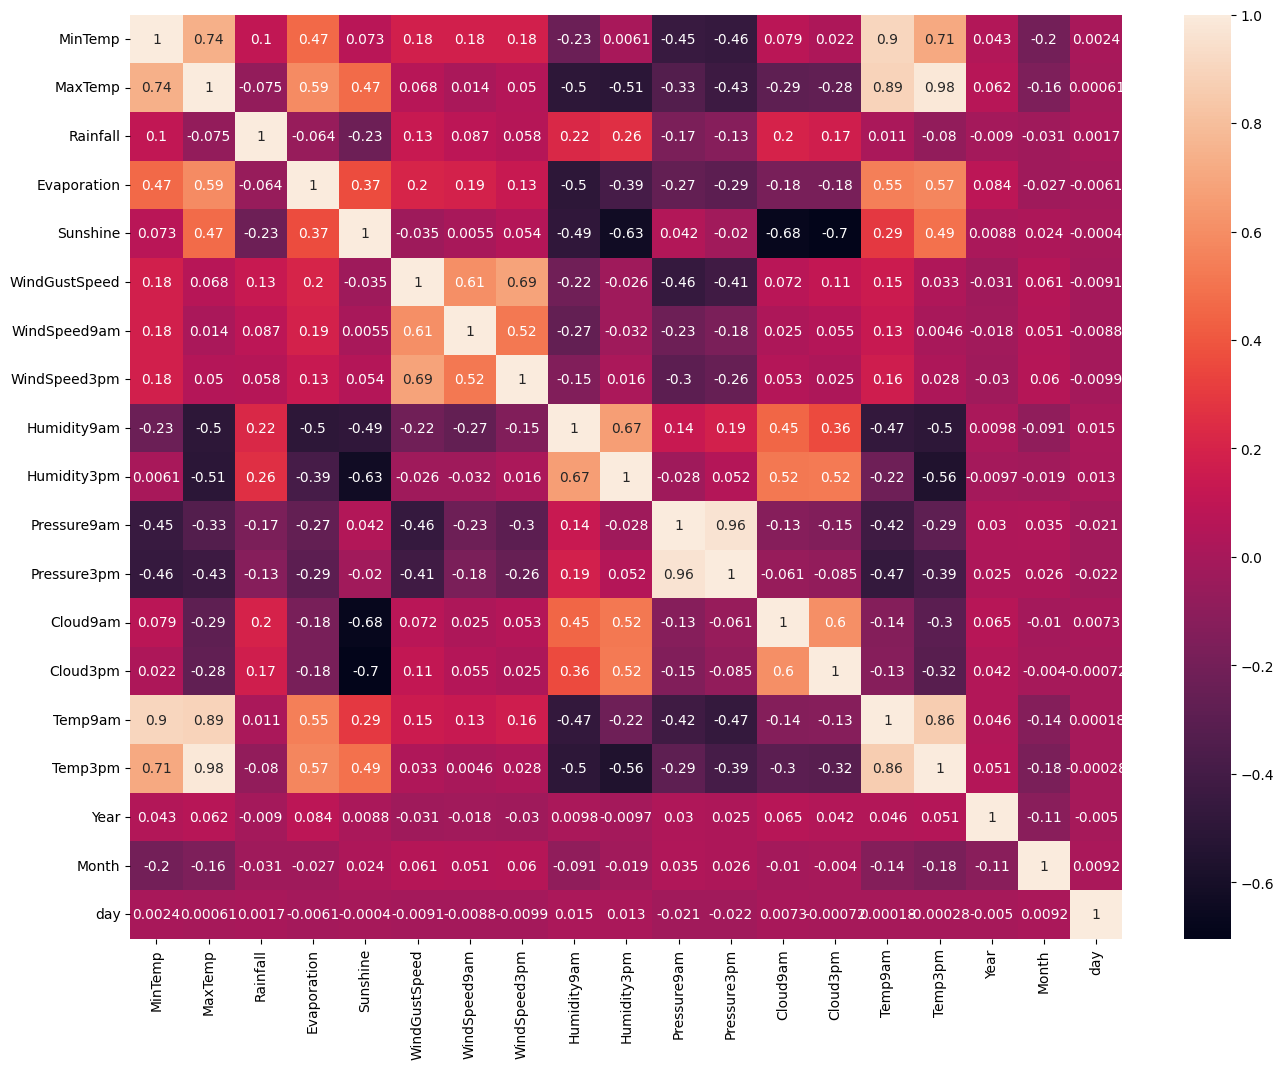

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df[num_cols].corr(), annot=True)

In [ ]:
df[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [ ]:
df[num_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
day                  0
dtype: int64

In [ ]:
#percentate of null values in the data set
df[num_cols].isnull().sum()/len(df)

MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustSpeed    0.070555
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
Year             0.000000
Month            0.000000
day              0.000000
dtype: float64

In [ ]:
for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [ ]:
df[num_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
day              0
dtype: int64

In [ ]:
#lets work on the Categorical features
df[cat_columns].isnull().sum()/len(df)

Location        0.000000
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64

In [ ]:
df[cat_columns].isnull().sum()/len(df)

Location        0.000000
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64

In [ ]:
for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
df[cat_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

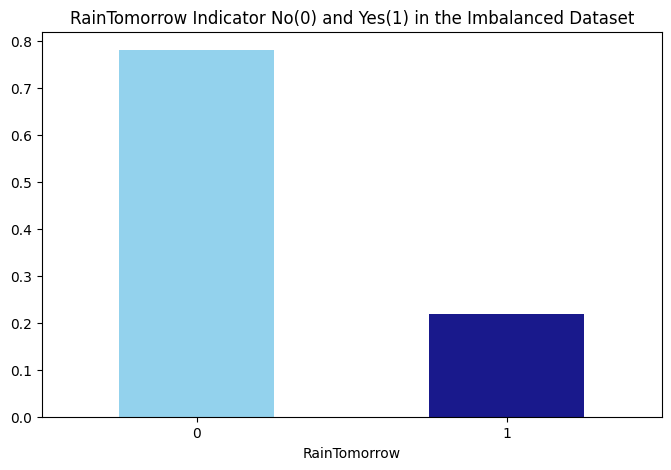

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

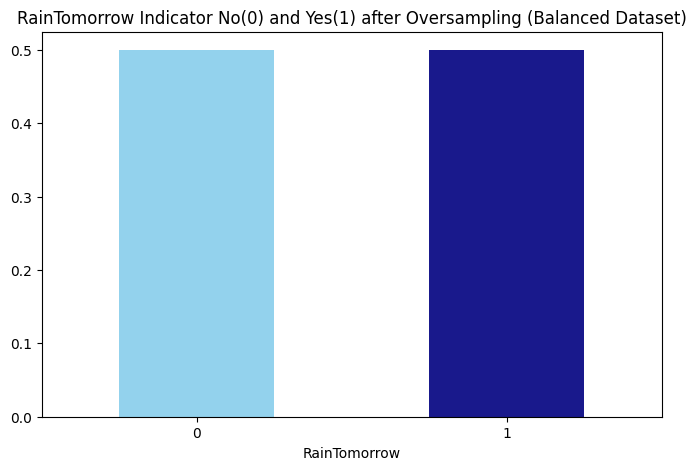

In [ ]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [ ]:
df1=df.copy()

In [ ]:
df1['Rainfall']=df1['Rainfall'].apply(lambda x: np.where(x>2.00,2.00,x))
df1['Evaporation']=df1['Evaporation'].apply(lambda x: np.where(x>14.60,14.60,x))
df1['WindGustSpeed']=df1['WindGustSpeed'].apply(lambda x: np.where(x>73.50,73.50,x))
df1['WindSpeed9am']=df1['WindSpeed9am'].apply(lambda x: np.where(x>37.00,37.00,x))
df1['WindSpeed3pm']=df1['WindSpeed3pm'].apply(lambda x: np.where(x>40.50,40.50,x))
df1.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,day
count,145460,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2013-04-04 21:08:51.907053568,12.192053,23.215962,0.476301,5.094777,7.989889,39.778681,13.939757,18.583126,68.901251,...,1015.250115,4.659755,4.709913,16.987101,21.668916,0.219167,0.219146,2012.769751,6.399615,15.712258
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,2011-01-11 00:00:00,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,...,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,2015-06-14 00:00:00,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,...,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,2017-06-25 00:00:00,33.900000,48.100000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000
std,NaN,6.365780,7.088358,0.787183,2.589589,2.757790,12.517354,8.555976,8.442404,18.855360,...,6.663994,2.281490,2.106768,6.449299,6.850658,0.413683,0.413669,2.537684,3.427262,8.794789


In [ ]:
df1.shape

(145460, 26)

In [ ]:
#Dropping date column
df1=df1.iloc[:,1:]
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,...,1020.3,5.0,5.0,10.1,22.4,0,0,2017,6,21
145456,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,...,1019.1,5.0,5.0,10.9,24.5,0,0,2017,6,22
145457,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,...,1016.8,5.0,5.0,12.5,26.1,0,0,2017,6,23
145458,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [ ]:
import pandas as pd

# Assuming 'rain' is your DataFrame

# Convert categorical variables to dummy variables (one-hot encoding)
df1 = pd.get_dummies(df1, columns=['Location', 'WindDir9am', 'WindDir3pm', 'WindGustDir'])

# Convert True/False values to 1/0
df1 = df1.astype(int)

# Display the updated DataFrame
print(df1.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       13       22         0            4         8             44   
1        7       25         0            4         8             44   
2       12       25         0            4         8             46   
3        9       28         0            4         8             24   
4       17       32         1            4         8             41   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindGustDir_NNW  \
0            20            24           71           22  ...                0   
1             4            22           44           25  ...                0   
2            19            26           38           30  ...                0   
3            11             9           45           16  ...                0   
4             7            20           82           33  ...                0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0               0

In [ ]:
print(df1.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW'],
      dtype='object', length=118)


In [ ]:
y = df1.RainTomorrow.values
x = df1.drop('RainTomorrow', axis=1)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13,22,0,4,8,44,20,24,71,22,...,0,0,0,0,0,0,0,1,0,0
1,7,25,0,4,8,44,4,22,44,25,...,0,0,0,0,0,0,0,0,1,0
2,12,25,0,4,8,46,19,26,38,30,...,0,0,0,0,0,0,0,0,0,1
3,9,28,0,4,8,24,11,9,45,16,...,0,0,0,0,0,0,0,0,0,0
4,17,32,1,4,8,41,7,20,82,33,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

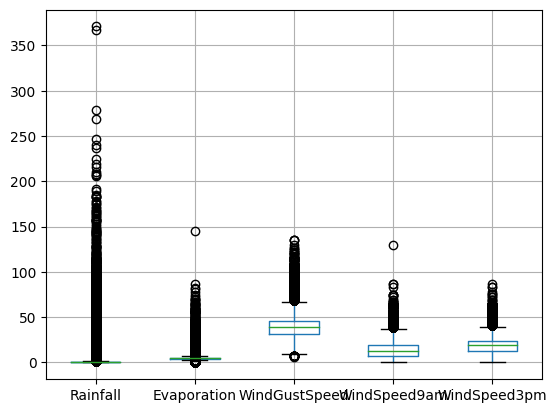

In [ ]:
df.boxplot(column=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm'])

<Axes: >

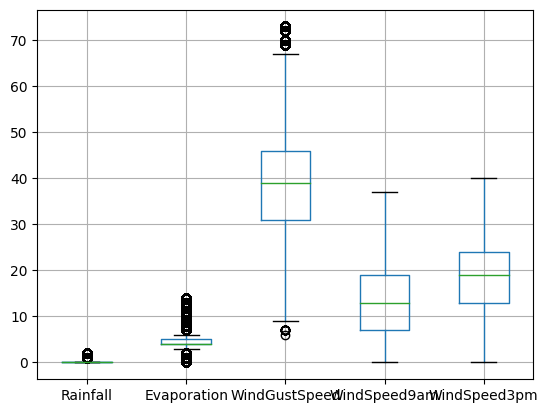

In [ ]:
df1.boxplot(column=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm'])

In [ ]:
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13,22,0,4,8,44,20,24,71,22,...,0,0,0,0,0,0,0,1,0,0
1,7,25,0,4,8,44,4,22,44,25,...,0,0,0,0,0,0,0,0,1,0
2,12,25,0,4,8,46,19,26,38,30,...,0,0,0,0,0,0,0,0,0,1
3,9,28,0,4,8,24,11,9,45,16,...,0,0,0,0,0,0,0,0,0,0
4,17,32,1,4,8,41,7,20,82,33,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Separate features (X) and target variable (y)
y = df1['RainTomorrow'].values.reshape(-1, 1)
X = df1.drop('RainTomorrow', axis=1)



In [ ]:
# Standardize features
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Add intercept term to X
X_scaled = np.insert(X_scaled.to_numpy(), 0, 1, axis=1)

In [ ]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define hypothesis function
def hypothesis(X, theta):
    return sigmoid(X.dot(theta))

# Define cost function
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost



In [ ]:
# Define gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for iteration in range(iterations):
        h = hypothesis(X, theta)
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")

    return theta, cost_history

# Split data into training (80%) and testing (20%) sets manually
num_samples = len(X_scaled)
num_train = int(0.8 * num_samples)

X_train, y_train = X_scaled[:num_train], y[:num_train]
X_test, y_test = X_scaled[num_train:], y[num_train:]

Iteration 0: Cost = 0.6699650564029446
Iteration 100: Cost = 0.3869022212435117
Iteration 200: Cost = 0.3723471364490604
Iteration 300: Cost = 0.3684567326807871
Iteration 400: Cost = 0.36687369848892476
Iteration 500: Cost = 0.36605407290035913
Iteration 600: Cost = 0.36554731917812994
Iteration 700: Cost = 0.36518906000337176
Iteration 800: Cost = 0.36491046135549005
Iteration 900: Cost = 0.3646796730415983
Iteration 1000: Cost = 0.36448067829976366
Iteration 1100: Cost = 0.3643047675671849
Iteration 1200: Cost = 0.3641468175956828
Iteration 1300: Cost = 0.3640035666728105
Iteration 1400: Cost = 0.36387277509843685
Iteration 1500: Cost = 0.3637527986147227
Iteration 1600: Cost = 0.36364236246806675
Iteration 1700: Cost = 0.3635404364042307
Iteration 1800: Cost = 0.3634461621129851
Iteration 1900: Cost = 0.36335880883932153
Iteration 2000: Cost = 0.3632777446725144
Iteration 2100: Cost = 0.36320241692205385
Iteration 2200: Cost = 0.36313233800597955
Iteration 2300: Cost = 0.3630670748

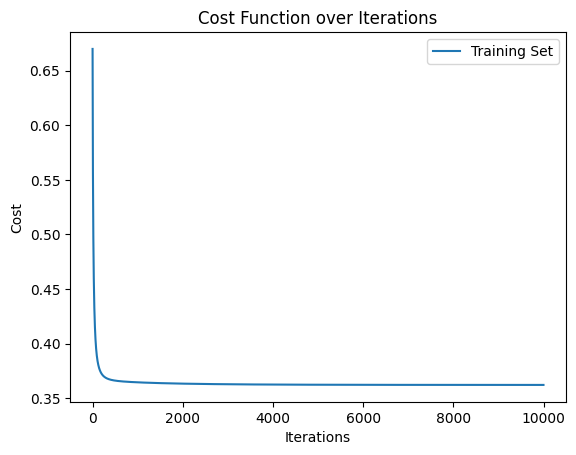

In [ ]:
# Initialize parameters
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.1
iterations = 10000

# Perform gradient descent for training set
theta_final_train, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Perform gradient descent for test set
theta_final_test, cost_history_test = gradient_descent(X_test, y_test, theta, alpha, iterations)

# Plot the cost history for training and test sets
plt.plot(range(iterations), cost_history_train, label='Training Set')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.legend()
plt.show()

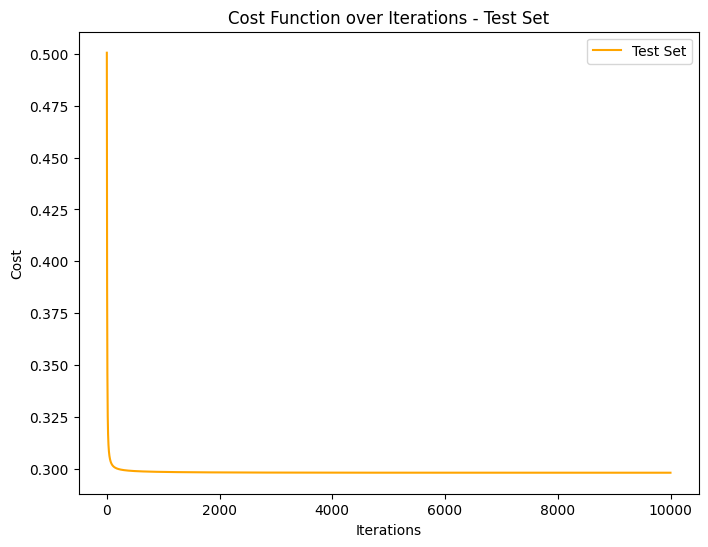

In [ ]:
# Plot the cost history for test set
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history_test, label='Test Set', color='orange')  # Set color to orange
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations - Test Set')
plt.legend()
plt.show()

In [ ]:

# Evaluate accuracy for training set
h_train = hypothesis(X_train, theta)
predictions_train = (h_train >= 0.5).astype(int)
accuracy_train = np.mean(predictions_train == y_train) * 100
print(f"Theta (Training Set): {theta.flatten()}")


# Display actual vs predicted for training set
print("\nActual vs Predicted for Training Set:")
for i in range(len(y_train)):
    print(f"Iteration {i+1}: Actual = {y_train[i, 0]}, Predicted = {predictions_train[i, 0]}")




Streaming output truncated to the last 5000 lines.
Iteration 98719: Actual = 1, Predicted = 0
Iteration 98720: Actual = 1, Predicted = 1
Iteration 98721: Actual = 0, Predicted = 1
Iteration 98722: Actual = 0, Predicted = 0
Iteration 98723: Actual = 0, Predicted = 0
Iteration 98724: Actual = 0, Predicted = 0
Iteration 98725: Actual = 0, Predicted = 0
Iteration 98726: Actual = 0, Predicted = 0
Iteration 98727: Actual = 0, Predicted = 0
Iteration 98728: Actual = 0, Predicted = 0
Iteration 98729: Actual = 0, Predicted = 0
Iteration 98730: Actual = 1, Predicted = 0
Iteration 98731: Actual = 1, Predicted = 1
Iteration 98732: Actual = 1, Predicted = 0
Iteration 98733: Actual = 1, Predicted = 0
Iteration 98734: Actual = 1, Predicted = 1
Iteration 98735: Actual = 1, Predicted = 0
Iteration 98736: Actual = 1, Predicted = 1
Iteration 98737: Actual = 1, Predicted = 0
Iteration 98738: Actual = 1, Predicted = 0
Iteration 98739: Actual = 0, Predicted = 0
Iteration 98740: Actual = 0, Predicted = 0
Ite

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Iteration 115174: Actual = 1, Predicted = 1
Iteration 115175: Actual = 0, Predicted = 1
Iteration 115176: Actual = 0, Predicted = 1
Iteration 115177: Actual = 1, Predicted = 1
Iteration 115178: Actual = 1, Predicted = 1
Iteration 115179: Actual = 0, Predicted = 0
Iteration 115180: Actual = 0, Predicted = 0
Iteration 115181: Actual = 0, Predicted = 0
Iteration 115182: Actual = 0, Predicted = 1
Iteration 115183: Actual = 0, Predicted = 0
Iteration 115184: Actual = 1, Predicted = 0
Iteration 115185: Actual = 0, Predicted = 0
Iteration 115186: Actual = 0, Predicted = 0
Iteration 115187: Actual = 0, Predicted = 0
Iteration 115188: Actual = 0, Predicted = 0
Iteration 115189: Actual = 0, Predicted = 0
Iteration 115190: Actual = 0, Predicted = 0
Iteration 115191: Actual = 0, Predicted = 0
Iteration 115192: Actual = 1, Predicted = 0
Iteration 115193: Actual = 1, Predicted = 1
Iteration 115194: Actual = 1, Predicted = 0
Iteration 115195: Actual = 0, Predicted = 0
Iteration 115196: Actual = 0, Pr

In [ ]:

# Evaluate accuracy for test set
h_test = hypothesis(X_test, theta)
predictions_test = (h_test >= 0.5).astype(int)
accuracy_test = np.mean(predictions_test == y_test) * 100
print(f"Theta (Test Set): {theta.flatten()}")

# Display actual vs predicted for test set
print("\nActual vs Predicted for Test Set:")
for i in range(len(y_test)):
    print(f"Iteration {i+1}: Actual = {y_test[i, 0]}, Predicted = {predictions_test[i, 0]}")

Streaming output truncated to the last 5000 lines.
Iteration 24093: Actual = 1, Predicted = 0
Iteration 24094: Actual = 0, Predicted = 0
Iteration 24095: Actual = 1, Predicted = 0
Iteration 24096: Actual = 1, Predicted = 0
Iteration 24097: Actual = 1, Predicted = 0
Iteration 24098: Actual = 0, Predicted = 0
Iteration 24099: Actual = 0, Predicted = 0
Iteration 24100: Actual = 0, Predicted = 0
Iteration 24101: Actual = 0, Predicted = 0
Iteration 24102: Actual = 0, Predicted = 0
Iteration 24103: Actual = 1, Predicted = 0
Iteration 24104: Actual = 0, Predicted = 1
Iteration 24105: Actual = 0, Predicted = 0
Iteration 24106: Actual = 1, Predicted = 1
Iteration 24107: Actual = 1, Predicted = 0
Iteration 24108: Actual = 0, Predicted = 0
Iteration 24109: Actual = 0, Predicted = 0
Iteration 24110: Actual = 0, Predicted = 0
Iteration 24111: Actual = 0, Predicted = 0
Iteration 24112: Actual = 0, Predicted = 0
Iteration 24113: Actual = 0, Predicted = 0
Iteration 24114: Actual = 0, Predicted = 0
Ite

In [ ]:
# Define functions to calculate metrics
def calculate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Calculate metrics for training set
accuracy_train, precision_train, recall_train, f1_score_train = calculate_metrics(y_train.flatten(), predictions_train.flatten())
print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

# Calculate metrics for test set
accuracy_test, precision_test, recall_test, f1_score_test = calculate_metrics(y_test.flatten(), predictions_test.flatten())
print("\nMetrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")

# Calculate overall accuracy
overall_accuracy = (accuracy_train + accuracy_test) / 2
print(f"\nOverall Accuracy: {overall_accuracy}")


Metrics for Training Set:
Accuracy: 0.8320758284064348
Precision: 0.6494977168949772
Recall: 0.5452106251676953
F1 Score: 0.592802517243535

Metrics for Test Set:
Accuracy: 0.8742265915028187
Precision: 0.7524306378942376
Recall: 0.5482031789910159
F1 Score: 0.6342828585707145

Overall Accuracy: 0.8531512099546268


## **Scikit-learn**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
y = df1['RainTomorrow']
X = df1.drop('RainTomorrow', axis=1)

# Reshape y to a 1D array
y = y.values.reshape(-1)

# Standardize features for both sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
df1.shape

(145460, 118)

In [ ]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (116368, 117)
X_test shape: (29092, 117)


In [ ]:


# Calculate overall accuracy using the combined dataset
accuracy_overall = model.score(X_scaled, y)

print(f"Overall Accuracy: {accuracy_overall:.2f}")

Overall Accuracy: 0.85


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Generate classification report for training set
report_train = classification_report(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Generate classification report for test set
report_test = classification_report(y_test, y_test_pred)

print("Classification Report - Training Set:")
print(report_train)
print("\nClassification Report - Test Set:")
print(report_test)


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     90911
           1       0.72      0.50      0.59     25457

    accuracy                           0.85    116368
   macro avg       0.80      0.72      0.75    116368
weighted avg       0.84      0.85      0.84    116368


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.72      0.49      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



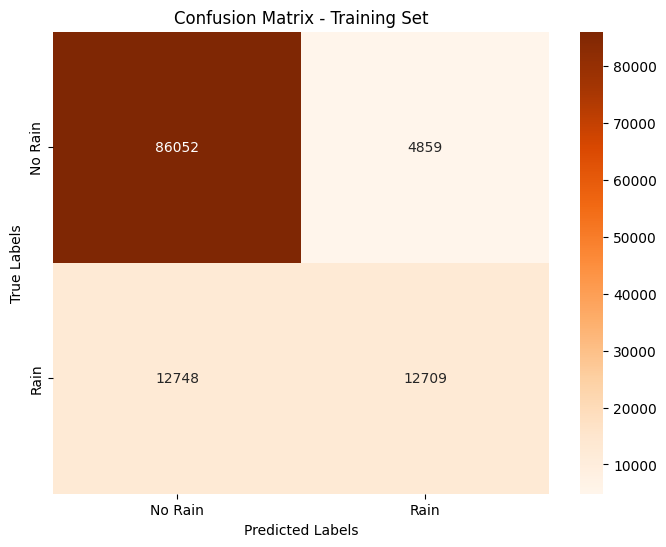

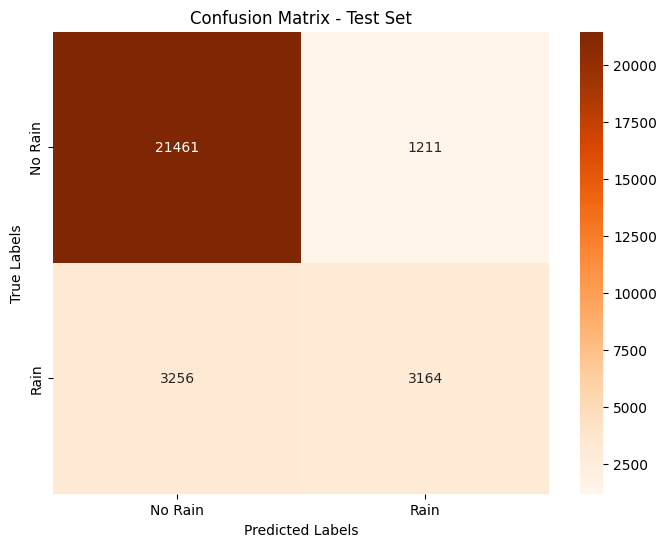

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = ['No Rain', 'Rain']

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')
plt.show()
